# Team Project 7
### Fall 2020 - UCSD Steam Recommender Systems Dataset

- Steven Louie
- Kunika Mittal
- Pranav Patil

In [9]:
# importing libraries
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import operator
import math
import matplotlib.pyplot as plt

# Process data files

In [2]:
# function used to process the data files
def eval_file(file):
    f = open(file, "r", encoding="utf-8")
    lst = []
    for line in f:
        obj = eval(line)
        lst.append(obj)
    json.dumps(lst)
    return lst

In [3]:
# process data files into respective variables
bundle_data = eval_file("../data/bundle_data.json")
users_items = eval_file("../data/australian_users_items.json")
steam_games = eval_file("../data/steam_games.json")

In [14]:
# create a dataframe from bundle_data that consists of all the games within each bundle
bundle_df = json_normalize(bundle_data, "items", ["bundle_final_price", "bundle_url", "bundle_price", "bundle_name", "bundle_id"])
# load games data in as a dataframe
steam_games_df = pd.DataFrame(data=steam_games)
bundle_data_df = pd.DataFrame(data=bundle_data)

/Users/pranavpatil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


# Data Analysis

# Data Analysis
Exploratory Data Analysis has been done to understand the datasets better. Since we have three different datasets that we are working with, it is mandatory to know what information would be useful while preprocessing the data.

#### Steam Games Dataset ####
The steam games dataset gives us the information about the different games available on the website. There are some of the features in the dataset that are not useful to us for recommending the individual games and building the customised bundles for the user. We plan to drop them all while doing data pre processing.

In [15]:
steam_games_df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


#### Finding out the top publishers of games in the dataset ####
There are more than 8000 publishers on the platform but majority of the games have been published by the top 5 publishers who amount up to about 20% of the games available in the dataset.

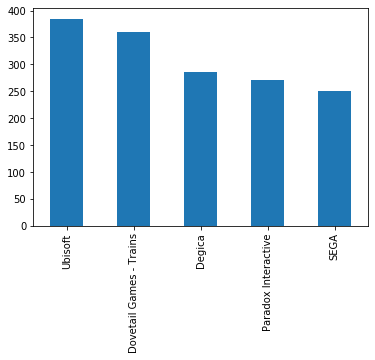

In [16]:
steam_games_df.publisher.value_counts().nlargest(5).plot.bar()

In [17]:
steam_games_df.publisher.value_counts()

Ubisoft                    385
Dovetail Games - Trains    360
Degica                     286
Paradox Interactive        271
SEGA                       251
                          ... 
WangJianWei                  1
Mad Ram Software             1
Fumiko Game Studio           1
MachineSpirit                1
David Lawrence               1
Name: publisher, Length: 8239, dtype: int64

#### Bundle Games Dataset ####

The bundles games dataset has been evaluated to understand the revenue modeling around the bundles. As the graph and the total value count of every discount shown below, majority of the games are discounted upto 25% while the highest discount offered is 94%. This information can be used to build customised bundles for the users offering them maximum discounts.

In [18]:
bundle_data_df.head()

,bundle_final_price,bundle_url,bundle_price,bundle_name,bundle_id,items,bundle_discount
0,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,450,"[{'genre': 'Adventure, Indie, RPG', 'item_id':...",10%
1,$20.15,http://store.steampowered.com/bundle/1473/?utm...,$25.87,"Naruto Shippuden Uncut Season 4, Vol. 3",1473,"[{'genre': '', 'item_id': '528360', 'discounte...",22%
2,$20.15,http://store.steampowered.com/bundle/1474/?utm...,$25.87,"Naruto Shippuden Uncut Season 4, Vol. 4",1474,"[{'genre': '', 'item_id': '528380', 'discounte...",22%
3,$15.17,http://store.steampowered.com/bundle/1437/?utm...,$25.35,Pixel Puzzles Ultimate: Starter Kit,1437,"[{'genre': 'Casual, Free to Play, Indie, Simul...",40%
4,$20.15,http://store.steampowered.com/bundle/1466/?utm...,$25.87,"Naruto Shippuden Uncut Season 4, Vol. 1",1466,"[{'genre': '', 'item_id': '527830', 'discounte...",22%


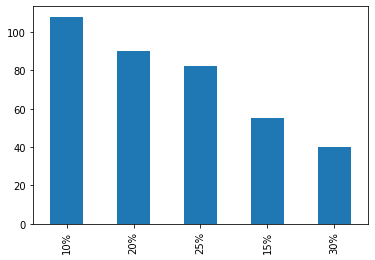

In [19]:
bundle_data_df.bundle_discount.value_counts().nlargest(5).plot.bar()

In [20]:
bundle_data_df.bundle_discount.value_counts()

10%     108
20%      90
25%      82
15%      55
30%      40
50%      34
0%       29
40%      25
33%      19
35%      11
22%      10
5%        8
16%       6
45%       6
67%       5
60%       5
17%       5
13%       4
7%        4
28%       4
80%       4
34%       3
29%       3
11%       3
65%       3
6%        3
39%       2
37%       2
89%       2
48%       2
62%       2
14%       2
57%       2
18%       2
23%       2
12%       2
38%       2
8%        2
75%       2
92%       2
61%       1
55%       1
46%       1
85%       1
42%       1
90%       1
86%       1
41%       1
49%       1
26%       1
32%       1
21%       1
7.5%      1
87%       1
36%       1
64%       1
9%        1
27%       1
Name: bundle_discount, dtype: int64

At this point we know who are the top publishers in our data set (Ubisoft, Dovetail Games - Trains, Degica, Paradox Interactive, SEGA) and an analysis of the marketplace (majority of the games are discounted upto 25%), we have some context of the data we will be using.

# Data Preprocessing

For data preprocessing, we will be cleaning up the datasets by removing any empty entries in the datasets. This will allow us to build a more effective recommender's system using data with non-empty entries.

We will be removing any games in the bundle's data that have no genre. Games that have no genre are not playable games and are probably media data such as movies, videos, songs, etc. These types of data will not be useful in our implementation, so it is best to filter them out.

In [46]:
# function used to remove any games in the bundle's data that have no genre
def clean_bundle_data(df):    
    clean_bundle_df = df[df["genre"]!=""]
    return clean_bundle_df

Some of the features in the steam games dataframe are duplicates of other features. For instance, 'app_name' and 'title' are two features in the dataset that mean the same thing and have the same value. Same goes for 'tags' where 'genres' mean and have the same value in the dataset. These extra features are of no use to us and will only make it harder to understand the dataset.

In [47]:
# remove unwanted features in steam games dataframe
def clean_games_data():
    steam_games_df.drop(labels=["app_name", "tags", "metascore"], axis=1, inplace=True)
    steam_games_df.dropna(subset=["title", "genres"], inplace=True)

Users that have no game history have no use in our recommender's system implementation because these users have nothing to offer, so it is best to filter them out.

In [48]:
# function used to remove any users that have not played any games
def remove_idle_users():
    # loop through users data and remove users that are idle
    for i in users_items:
        if i["items_count"]==0:
            users_items.remove(i)

In [49]:
# function used to perform the aforementioned preprocessing techniques
def perform_data_preprocessing():
    clean_games_data()
    remove_idle_users()
    np.random.shuffle(users_items)

In the user-items dataset, there are users that have played hundreds and hundreds of games but not all data are useful and meaningful to us. For instance, users that might've downloaded a game but have not played or played long enough to show any interest in the game are not useful because users that like to play a specific type of game or game will show more playing time. Therefore, this function is dedicated to filter out any items in the active user's items list that have little to no play time at all because noisy data will only skew and affect our results in a negative way.

In [50]:
# function used to filter out any games user has played with little to no playing time at all
# returns a dataframe of relevant games user has played
def filter_by_playtime(user_id, playtime):
    user_data = {}
    
    for user in users_items:
        if user["user_id"]==user_id:
            user_data = user
            break
    
    filtered_df = json_normalize(user_data, "items", ["user_id", "steam_id", "user_url"])
    filtered_df = filtered_df[filtered_df["playtime_forever"] > playtime]
    
    return filtered_df, user_data

In [26]:
# function used to extract every genre in every bundle
def extract_genres_data_from_bundles(bundle_df): 
    
    clean_bundle_df = clean_bundle_data(bundle_df)
    
    # uses an object to hold key value pairs
    # keys will be bundle id and values will be genres of games inside that bundle
    filter_genre_from_bundle = {}
    
    # loop through every bundle and extract genres
    for id_ in clean_bundle_df["bundle_id"].unique():
        genres_list = []
        for genres in clean_bundle_df[clean_bundle_df["bundle_id"]==id_]["genre"]:
            for genre in genres.split(", "):
                if genre not in genres_list:
                    genres_list.append(genre)
        filter_genre_from_bundle[id_] = genres_list
        
    return filter_genre_from_bundle

In [27]:
perform_data_preprocessing()

In [28]:
steam_games_df.head()

,publisher,genres,title,url,release_date,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,NaN,http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd,Mixed


In [29]:
all_bundles_genres_data = extract_genres_data_from_bundles(bundle_df)

The following user that we will be working with is a user that has played some games on the Steam platform whose id will be shown below. Our recommender's system does not worry about users that haven't played any games and only focuses on the ones that have. Again this is a random user in the users dataset that has some games logged on the Steam platform.

In [30]:
users_items[0]["user_id"]

'76561198109108006'

In [31]:
filtered_playtime_df, active_user_data = filter_by_playtime(users_items[0]["user_id"], 60)

/Users/pranavpatil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


# Use Case #1: Recommend bundles to a user based on most played genres

The first use case of our project is using a content-based recommendation system to recommend bundles to the active user based on the user's top played genres. This is similar to a user logging into Steam and seeing a list of recommendations based on the history of games that user has played. We are only recommending bundles that are most similar to the active user because this would improve user experience by recommending bundles that contain games that user has previously shown interest in playing.

In [42]:
# function used to calculate the cosine similarity between two given vectors
def cosine_sim(vector1, vector2):
    
    # holds the cosine similarity score of the two vectors
    cos = 0
    
    # used to store 0s or 1s for respective vector
    lst1 = []
    lst2 = []
    
    # gets the elements that appear in both vectors and store them in a list
    vector = list(set().union(vector1, vector2))
    
    # for every element in both vectors, append 1 to lst1 if element appears in vectors otherwise append 0
    # repeat this for both vectors
    for i in vector:
        if i in vector1:
            lst1.append(1)
        else:
            lst1.append(0)    
        if i in vector2:
            lst2.append(1)
        else:
            lst2.append(0)
        cos += lst1[-1]*lst2[-1]
    
    # used to hold the magnitude of cosine which is the multiple of the length vectors
    magnitude = float((sum(lst1)*sum(lst2))**0.5)
    
    # only calculate cosine similarity if magnitude/denominator is not zero
    if magnitude != 0:
        cos = cos / magnitude
    
    return cos, magnitude

In [43]:
# function used to calculate the jaccard similarity between two vectors
def jaccard_sim(vector1, vector2):
    jac = 0
    
    intersection = list(set(vector1).intersection(vector2))
    union = list(set().union(vector1, vector2))
    
    return float(len(intersection))/float(len(union))

The function takes the previously filtered dataframe that has filtered out games that user have not played or have little play time to extract every type of genre of games user has played. This will return a list of sorted genres in descending order which will later be used to extract only the top genres user has played.

In [44]:
# function used to extract every genre that user has played from the previously filtered dataframe
def get_all_genres_by_user(user):
    genre_count = {}
    for index, row in user.iterrows():
        if steam_games_df[steam_games_df["id"]==row["item_id"]].index.any()==True:
            game_genres = steam_games_df[steam_games_df["id"]==row["item_id"]]["genres"].values[0]
            for genre in game_genres:
                if genre not in genre_count:
                    genre_count[genre] = 1
                else:
                    genre_count[genre] = genre_count[genre] + 1

    return sorted(genre_count.items(), key=operator.itemgetter(1), reverse=True)

In [45]:
# function used to get the top genres user has played
# this will give us a better understanding of what type of games user likes to play and only recommend relevant games
def parse_genres(genres):
    lst = []
    for genre in genres[:math.ceil(len(genres)*.6)]:
        lst.append(genre[0])
    return lst

In order to recommend relevant bundles to the user, we have to calculate the cosine similarity between user's top genres played and genres of each bundle. This function will return a list of sorted bundles in descending order which will be used later to filter out and recommend the most similar bundles based on user's top played genres.

In [36]:
# function used to calculate the similarity scores between user's top genres played and genres of each bundle
def get_bundle_similarity_scores(user_genres, all_bundles_genres_data):
    cos_sim = {}
    jac_sim = {}
    for id_ in list(all_bundles_genres_data.keys()):
        bundle_genres = all_bundles_genres_data[id_]

        cos,_ = cosine_sim(user_genres, bundle_genres)
        jac = jaccard_sim(user_genres, bundle_genres)
        
        cos_sim[id_] = cos
        jac_sim[id_] = jac
    
    return sorted(cos_sim.items(), key=operator.itemgetter(1), reverse=True), sorted(jac_sim.items(), key=operator.itemgetter(1), reverse=True) 

In [37]:
all_user_genres = get_all_genres_by_user(filtered_playtime_df)

In [38]:
top_rated_genres = parse_genres(all_user_genres)

Here is a list of the top played genres by the active user. This output will be used to get the most similar bundles to the top played genres by the user. This is done to cater to the active user's preferences and improve user experience by recommending bundles that are most similar to top played genres by the user.

In [39]:
top_rated_genres

[]

In [40]:
bundle_cosine_sims, bundle_jaccard_sims = get_bundle_similarity_scores(top_rated_genres, all_bundles_genres_data)

The following results are the cosine similarity scores of the bundles data and are in the form of a tuple (bundle id, cosine similarity score) and the bundles in descending order and will be used to get the top k bundles to recommend to the users.

In [41]:
bundle_cosine_sims

[('450', 0),
 ('1437', 0),
 ('1478', 0),
 ('1482', 0),
 ('1400', 0),
 ('1471', 0),
 ('1477', 0),
 ('1284', 0),
 ('1468', 0),
 ('1225', 0),
 ('1455', 0),
 ('1011', 0),
 ('419', 0),
 ('1460', 0),
 ('317', 0),
 ('1379', 0),
 ('1385', 0),
 ('1137', 0),
 ('279', 0),
 ('1440', 0),
 ('1441', 0),
 ('658', 0),
 ('355', 0),
 ('1401', 0),
 ('1418', 0),
 ('1282', 0),
 ('1399', 0),
 ('1392', 0),
 ('1404', 0),
 ('1406', 0),
 ('1407', 0),
 ('1293', 0),
 ('1248', 0),
 ('1409', 0),
 ('1410', 0),
 ('1382', 0),
 ('1386', 0),
 ('1356', 0),
 ('1332', 0),
 ('667', 0),
 ('1390', 0),
 ('1349', 0),
 ('1373', 0),
 ('1295', 0),
 ('1387', 0),
 ('1222', 0),
 ('803', 0),
 ('498', 0),
 ('396', 0),
 ('1372', 0),
 ('972', 0),
 ('1378', 0),
 ('1268', 0),
 ('1328', 0),
 ('825', 0),
 ('473', 0),
 ('1297', 0),
 ('604', 0),
 ('1333', 0),
 ('1336', 0),
 ('1340', 0),
 ('1153', 0),
 ('1355', 0),
 ('1161', 0),
 ('567', 0),
 ('1361', 0),
 ('903', 0),
 ('1271', 0),
 ('1330', 0),
 ('1350', 0),
 ('1351', 0),
 ('1352', 0),
 ('1209'

The following results are the jaccard similarity scores of the bundles data and are in the form of a tuple (bundle id, jaccard similarity score) and the bundles in descending order and will be used to get the top k bundles to recommend to the users.

In [85]:
bundle_jaccard_sims

[('462', 0.8),
 ('1392', 0.75),
 ('1349', 0.75),
 ('983', 0.75),
 ('280', 0.75),
 ('824', 0.6666666666666666),
 ('646', 0.6666666666666666),
 ('623', 0.6666666666666666),
 ('332', 0.6666666666666666),
 ('339', 0.6666666666666666),
 ('1477', 0.6),
 ('419', 0.6),
 ('507', 0.6),
 ('614', 0.6),
 ('262', 0.6),
 ('1085', 0.6),
 ('653', 0.6),
 ('1068', 0.6),
 ('259', 0.6),
 ('1217', 0.6),
 ('1151', 0.6),
 ('384', 0.6),
 ('1130', 0.6),
 ('846', 0.6),
 ('781', 0.6),
 ('474', 0.6),
 ('610', 0.6),
 ('274', 0.6),
 ('296', 0.6),
 ('302', 0.6),
 ('336', 0.6),
 ('369', 0.6),
 ('385', 0.6),
 ('428', 0.6),
 ('396', 0.5714285714285714),
 ('505', 0.5714285714285714),
 ('364', 0.5714285714285714),
 ('399', 0.5714285714285714),
 ('482', 0.5714285714285714),
 ('957', 0.5714285714285714),
 ('804', 0.5714285714285714),
 ('403', 0.5714285714285714),
 ('542', 0.5714285714285714),
 ('356', 0.5714285714285714),
 ('450', 0.5),
 ('1455', 0.5),
 ('1011', 0.5),
 ('1382', 0.5),
 ('1386', 0.5),
 ('1222', 0.5),
 ('803',

In [86]:
# function takes the number of bundle recommendations to recommend to the active user
def get_bundle_recommendations(user_id, num_recommendations, sim, bundle_data=bundle_data):
    
    # list used to hold the top n bundles and recommend them to the user
    recommendations = []
    for id_ in sim[:num_recommendations]:
        for bundle in bundle_data:
            if bundle["bundle_id"]==id_[0]:
                recommendations.append(bundle)
                break
    
    return recommendations

In [87]:
cosine_recommendations = get_bundle_recommendations(users_items[0]["user_id"], 3, bundle_cosine_sims)

In [88]:
jaccard_recommendations = get_bundle_recommendations(users_items[0]["user_id"], 3, bundle_jaccard_sims)

The final results our our content-based recommender system is a list of bundles that were recommended to the active user based on the top played genres by the active user. Our algorithm only recommends the most similar bundles to the active user in order to maximize the user experience because recommending a bundle that user have no interest in will not be a very useful recommender's system. The following results are 3 bundles that were recommended using cosine similarity and jaccard similarity.

In [89]:
cosine_recommendations

[{'bundle_final_price': '$26.97',
  'bundle_url': 'http://store.steampowered.com/bundle/462/?utm_source=SteamDB&utm_medium=SteamDB&utm_campaign=SteamDB%20Bundles%20Page',
  'bundle_price': '$29.97',
  'bundle_name': 'Complete Trese Brothers Pack',
  'bundle_id': '462',
  'items': [{'genre': 'Indie, RPG, Strategy',
    'item_id': '291190',
    'discounted_price': '$9.99',
    'item_url': 'http://store.steampowered.com/app/291190',
    'item_name': 'Heroes of Steel RPG'},
   {'genre': 'Indie, Simulation, Strategy',
    'item_id': '334270',
    'discounted_price': '$9.99',
    'item_url': 'http://store.steampowered.com/app/334270',
    'item_name': 'Star Traders: 4X Empires'},
   {'genre': 'Action, Indie, RPG, Strategy',
    'item_id': '370020',
    'discounted_price': '$9.99',
    'item_url': 'http://store.steampowered.com/app/370020',
    'item_name': 'Templar Battleforce'}],
  'bundle_discount': '10%'},
 {'bundle_final_price': '$20.14',
  'bundle_url': 'http://store.steampowered.com/bu

In [90]:
jaccard_recommendations

[{'bundle_final_price': '$26.97',
  'bundle_url': 'http://store.steampowered.com/bundle/462/?utm_source=SteamDB&utm_medium=SteamDB&utm_campaign=SteamDB%20Bundles%20Page',
  'bundle_price': '$29.97',
  'bundle_name': 'Complete Trese Brothers Pack',
  'bundle_id': '462',
  'items': [{'genre': 'Indie, RPG, Strategy',
    'item_id': '291190',
    'discounted_price': '$9.99',
    'item_url': 'http://store.steampowered.com/app/291190',
    'item_name': 'Heroes of Steel RPG'},
   {'genre': 'Indie, Simulation, Strategy',
    'item_id': '334270',
    'discounted_price': '$9.99',
    'item_url': 'http://store.steampowered.com/app/334270',
    'item_name': 'Star Traders: 4X Empires'},
   {'genre': 'Action, Indie, RPG, Strategy',
    'item_id': '370020',
    'discounted_price': '$9.99',
    'item_url': 'http://store.steampowered.com/app/370020',
    'item_name': 'Templar Battleforce'}],
  'bundle_discount': '10%'},
 {'bundle_final_price': '$20.14',
  'bundle_url': 'http://store.steampowered.com/bu

Now I will evaluate the recommended bundles generated by cosine similarity and jaccard similarity and see how similarl the top bundles are to the top played genres of the active user. As you can see from the outputs above, the bundles generated by cosine similarity and jaccard similarity are the same but cosine similarity generated a higher similarity score than jaccard similarity.

# Use Case #2: Bundle generation and recommendation for a group of users

The second use case that we'll be covering is recommending personalized bundles to a group of users. On the Steam platform, there are community groups where users are able to interact and share their progress on a game and we wanted to implement a recommender's system that can effectively recommend personalized bundles for the group of users to enjoy and play together.

# Group Generation

What we are doing here is creating a community of users that are most similar (users that show interest in similar genres of games) to the active user. The purpose of generating a group of users that are most similar to one another is to ensure that the personalized bundle that we will be creating will soothe and appease all users in the community. This approach is better than random selection of users because not everyone will like the same types of games.

In [183]:
# function used to generate a group of users that are most similar (users that have played similar genres of games) to the active user
# function takes two parameters:
# user_id: the id of the active user
# num_of_users: the total number of users to form a community for
def group_generation(user_data, num_of_users):
            
    user_df = json_normalize(user_data, "items", ["user_id", "steam_id", "user_url"])
    user_df = user_df[user_df["playtime_forever"] > 60]
    
    # gets the list of top genres played by the active user
    genres = get_all_genres_by_user(user_df)
    top_rated_genres = parse_genres(genres)

    # used to store the most similar users to the active user
    sim = {}
    sim[active_user_data["user_id"]] = 1
    counter = 1
    
    # loop through all users and find most similar users
    for user in users_items:
        if user["user_id"]!=active_user_data["user_id"]:
            u_df = json_normalize(user, "items", ["user_id", "steam_id", "user_url"])
            g = get_all_genres_by_user(u_df)
            parsed_genres = parse_genres(g)
            
            cos, magnitude = cosine_sim(top_rated_genres, parsed_genres)
            
            if magnitude==0:
                continue
                
            if cos >= 0.85:
                counter += 1
                sim[user["user_id"]] = cos
                
            if counter == num_of_users:
                break
                    
    return sorted(sim, key=operator.itemgetter(1), reverse=True)

In [184]:
users_group = group_generation(active_user_data, 10)

The results of group generation based on the active user can be seen below. The user id's of similar users are stored in a list that will be used later for bundle generation and recommendation.

In [185]:
users_group

['Platinite',
 '76561198066835730',
 '76561198073725668',
 '76561197977404207',
 '76561198037922446',
 '76561198091911652',
 '76561198018544799',
 '76561197990751932',
 '76561197960962392',
 '76561198089229212']

# Bundle Generation and Recommedation

Generating a community of users was the first part of this use case, generating a personalized bundle and recommending the group of users this bundle is the second part. How bundle generation works is because we are working with a group of users as opposed to a single user, we will only focus on the online multiplayer games in the steam games dataset for our bundle generation. This will allow users in the community to play and enjoy the games together to their fit.

In [187]:
# function used to filter out only the multiplayer games in the steam games dataset
# function parameters:
# steam_games: steam games dataset
def get_multiplayer_games(steam_games):
    games = steam_games.copy()
    
    # loop through each game in the steam games dataset to find only the online multiplayer games 
    for i, row in games.iterrows():
        flag = False
        if type(row["specs"]) != list:
            games.drop([i], inplace=True)
            continue
            
        for spec in row["specs"]:
            if spec=="Online Multi-Player":
                flag = True
                break
                
        if flag==False:
            games.drop([i], inplace=True)
            
    games.reset_index(inplace=True)
    
    # used to fill in any empty values for discount price and price b/c free to play items are string values
    games["discount_price"].fillna(0, inplace=True)
    games["price"].fillna(0, inplace=True)
    
    return games

In [188]:
multiplayer_games = get_multiplayer_games(steam_games_df)

This is done to get the top genres from the users group which will be used to generate a personalized bundle for the users group to enjoy.

In [205]:
# function used to get the top genres from the users group
# function parameters:
# users_group: the user group generated
def get_top_genres_from_users_group(users_group):
    all_genres = {}
    
    for user in users_group:
        user_data = {}
        for u in users_items:
            if u["user_id"]==user:
                user_data = u
                break
            
        user_df = json_normalize(user_data, "items", ["user_id", "steam_id", "user_url"])
    
        genres = get_all_genres_by_user(user_df)
    
        for genre in genres:
            if genre[0] not in all_genres:
                all_genres[genre[0]] = genre[1]
            else:
                all_genres[genre[0]] += genre[1]
          
    all_genres = sorted(all_genres.items(), key=operator.itemgetter(1), reverse=True)
    
    return parse_genres(all_genres)

In [206]:
top_users_group_genres = get_top_genres_from_users_group(users_group)

As you can see here are the top genres from the users group, which is not much different than the top genres of the active user. This is expected because only similar users were picked to form the users group.

In [207]:
top_users_group_genres

['Action',
 'Indie',
 'RPG',
 'Adventure',
 'Simulation',
 'Free to Play',
 'Casual',
 'Strategy']

In [208]:
# function is used to get top n games from the multiplayer's dataframe
# function parameters are:
# games: multiplayer dataframe
# users_group: the group of users generated
# top_genres: the top genres from the users group
# num_of_games: the number of games to select for bundle generation
def get_most_similar_games(games, users_group, top_genres, num_of_games):
    sim = {}
    for i, row in games.iterrows():
        game_genres = row["genres"]
        
        cos, magnitude = cosine_sim(top_genres, game_genres)
        
        if magnitude==0:
            continue
                
        sim[row["id"]] = cos
    
    sim = sorted(sim.items(), key=operator.itemgetter(1), reverse=True)
    
    # only return the given number of games which will be used to form the bundle
    games_list = []
    for i in sim[:num_of_games]:
        games_list.append(i[0])
        
    return games_list

In [209]:
list_of_games = get_most_similar_games(multiplayer_games, users_group, top_users_group_genres, 10)

Here are the list of games that were selected based on the top genres from the users group. These games will be used to generate a personalized bundle based off of genres of games every user in the group has played or have interest in.

In [210]:
list_of_games

['666600',
 '335180',
 '515710',
 '638180',
 '254200',
 '402560',
 '465710',
 '610380',
 '696140',
 '622370']

Now using the list of multiplayer games generated above, we will create a personalized bundle out of those games and recommend that to the group of users.

In [196]:
# function used to generate a personalized bundle based off of games selected
def bundle_generation(games):
    
    # object used to store bundle data
    bundle = {}
    bundle["bundle_name"] = "Made just for you"
    bundle["bundle_id"] = "MADE FOR YOU"
    bundle["items"] = []
    discounted_total = 0
    total_price = 0
    
    # for each game selected, generate item data for it
    for id_ in games:
        game = multiplayer_games[multiplayer_games["id"]==id_]
        
        item_info = {}
        item_info["item_id"] = id_
        item_info["genre"] = ', '.join(map(str, game["genres"].values[0]))
        item_info["name"] = game["title"].values[0]
        
        if type(game["price"].values[0]) != str:
            total_price += game["price"].values[0]
        else:
            total_price += 0
        
        discounted_total += game["discount_price"].values[0]
        
        bundle["items"].append(item_info)
    
    # the final price of the bundle will be prices of all the games minus the discounts steam has provided
    bundle["bundle_final_price"] = total_price - discounted_total
    
    return bundle

In [197]:
personalized_bundle = bundle_generation(list_of_games)

Here is the personalized bundle generated for the group of users that were selected. These games were hand picked and the bundle was designed based on the genres of games users in the group has played the most. This personalized bundle will be used to evaluate against all the pre-existing bundles in the bundles dataset to see how well our personalized bundle perform against the existing bundles.

In [198]:
personalized_bundle

{'bundle_name': 'Made just for you',
 'bundle_id': 'MADE FOR YOU',
 'items': [{'item_id': '666600',
   'genre': 'Action, Adventure, Casual, Indie, RPG, Simulation, Strategy',
   'name': 'Zombie Town'},
  {'item_id': '335180',
   'genre': 'Action, Adventure, Free to Play, Indie, RPG, Simulation, Strategy',
   'name': 'StarMade Demo'},
  {'item_id': '515710',
   'genre': 'Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG, Simulation',
   'name': 'Creativerse - Pro'},
  {'item_id': '638180',
   'genre': 'Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG, Simulation',
   'name': 'Creativerse - Welcome Bundle'},
  {'item_id': '254200',
   'genre': 'Adventure, Casual, Indie, RPG, Simulation, Strategy',
   'name': 'FortressCraft Evolved!'},
  {'item_id': '402560',
   'genre': 'Casual, Free to Play, Indie, RPG, Simulation, Strategy',
   'name': 'Tabletopia'},
  {'item_id': '465710',
   'genre': 'Action, Adventure, Free to Play, Indie, RPG, Stra

In [199]:
genres_from_personalized_bundle = extract_genres_data_from_bundles(json_normalize(personalized_bundle, "items", ["bundle_final_price", "bundle_name", "bundle_id"]))

These are the top rated genres from the personalized bundle that will be used to evaluate how well the games in the bundle perform against the most played genres from the users group.

In [201]:
genres_from_personalized_bundle

{'MADE FOR YOU': ['Action',
  'Adventure',
  'Casual',
  'Indie',
  'RPG',
  'Simulation',
  'Strategy',
  'Free to Play',
  'Massively Multiplayer']}

Now we will perform evaluation on the personalized bundle to see how the newly personalized bundle holds up against the pre-existing bundles. The results of this function will be the cosine similarity scores and jaccard similarity scores between top genres of the users group and all bundles including the personalized bundle in descending order because we want to visualize how well the new bundle performed.

In [215]:
# function is used to evaluate the personalized bundle against all pre-existing bundles
def evaluate_generated_bundle(users_group, all_bundles_genres_data, bundle_sim):
    cos_sim = {}
    jac_sim = {}
    for user in users_group:
        user_data = {}
        
        for u in users_items:
            if u["user_id"]==user:
                user_data = u
                break

        user_df = json_normalize(user_data, "items", ["user_id", "steam_id", "user_url"])
        user_df = user_df[user_df["playtime_forever"] > 100]

        genres = get_all_genres_by_user(user_df)
        top_rated_genres = parse_genres(genres)
        
        for id_ in list(all_bundles_genres_data.keys()):
            if id_ not in cos_sim:
                cos_sim[id_] = 0
            if id_ not in jac_sim:
                jac_sim[id_] = 0
                
            bundle_genres = all_bundles_genres_data[id_]

            cos,_ = cosine_sim(top_rated_genres, bundle_genres)
            jac = jaccard_sim(top_rated_genres, bundle_genres)

            cos_sim[id_] += cos
            jac_sim[id_] += jac
            
        for id_ in list(bundle_sim.keys()):
            if id_ not in cos_sim:
                cos_sim[id_] = 0
            if id_ not in jac_sim:
                jac_sim[id_] = 0
                
            bundle_genres = bundle_sim[id_]

            cos,_ = cosine_sim(top_rated_genres, bundle_genres)
            jac = jaccard_sim(top_rated_genres, bundle_genres)
            
            cos_sim[id_] += cos
            jac_sim[id_] += jac
            
    return sorted(cos_sim.items(), key=operator.itemgetter(1), reverse=True), sorted(jac_sim.items(), key=operator.itemgetter(1), reverse=True)

In [216]:
bundle_cosine_similarities, bundle_jaccard_similarities = evaluate_generated_bundle(users_group, all_bundles_genres_data, genres_from_personalized_bundle)

In [217]:
bundle_cosine_similarities

[('1392', 7.840187787218773),
 ('1349', 7.840187787218773),
 ('983', 7.840187787218773),
 ('653', 7.749297322016712),
 ('1068', 7.749297322016712),
 ('1130', 7.749297322016712),
 ('474', 7.749297322016712),
 ('302', 7.749297322016712),
 ('336', 7.749297322016712),
 ('385', 7.749297322016712),
 ('428', 7.749297322016712),
 ('646', 7.528976032150283),
 ('339', 7.528976032150283),
 ('462', 7.389381125701739),
 ('824', 7.293273771754767),
 ('623', 7.293273771754767),
 ('347', 7.189381125701739),
 ('990', 7.189381125701739),
 ('728', 7.189381125701739),
 ('260', 7.189381125701739),
 ('476', 7.131182235954577),
 ('419', 7.106878715982252),
 ('262', 7.106878715982252),
 ('1151', 7.106878715982252),
 ('384', 7.106878715982252),
 ('280', 7.098386676965934),
 ('259', 7.078476928766776),
 ('1455', 7.0205533232371975),
 ('1382', 7.0205533232371975),
 ('1386', 7.0205533232371975),
 ('1372', 7.0205533232371975),
 ('1161', 7.0205533232371975),
 ('357', 7.0205533232371975),
 ('416', 7.0205533232371975

In [218]:
bundle_jaccard_similarities

[('1392', 6.633333333333334),
 ('1349', 6.633333333333334),
 ('983', 6.633333333333334),
 ('653', 6.485714285714286),
 ('1068', 6.485714285714286),
 ('1130', 6.485714285714286),
 ('474', 6.485714285714286),
 ('302', 6.485714285714286),
 ('336', 6.485714285714286),
 ('385', 6.485714285714286),
 ('428', 6.485714285714286),
 ('646', 5.875),
 ('339', 5.875),
 ('419', 5.766666666666667),
 ('262', 5.766666666666667),
 ('1151', 5.766666666666667),
 ('384', 5.766666666666667),
 ('462', 5.761904761904761),
 ('824', 5.660714285714286),
 ('623', 5.660714285714286),
 ('280', 5.6),
 ('259', 5.585714285714286),
 ('347', 5.583333333333332),
 ('990', 5.583333333333332),
 ('728', 5.583333333333332),
 ('260', 5.583333333333332),
 ('476', 5.495238095238094),
 ('658', 5.333333333333333),
 ('903', 5.333333333333333),
 ('1330', 5.333333333333333),
 ('869', 5.333333333333333),
 ('1191', 5.333333333333333),
 ('490', 5.333333333333333),
 ('281', 5.333333333333333),
 ('341', 5.333333333333333),
 ('1196', 5.3333

The results show that the personalized bundle performed in the top percentile of all the bundles in the bundles dataset using cosine and jaccard similarities. Both similarity metrics generated the same output and specified that our personalized bundle performed better than most bundles in the bundles data. This means that our personalized bundle caters to the users group better than most bundles in the bundles data. It is no surprise that our bundle performs well with the users group because this was generated using the top games the each user in the users group has played.

In [237]:
print("Using cosine similarity, our personalized bundle sits in the top {}th percentile of all bundles data.".format(int(100-(([x[0] for x in bundle_cosine_similarities].index("MADE FOR YOU")+1)/len(bundle_cosine_similarities)*100))))

Using cosine similarity, our personalized bundle sits in the top 80th percentile of all bundles data.


In [238]:
print("Using jaccard similarity, our personalized bundle sits in the top {}th percentile of all bundles data.".format(int(100-(([x[0] for x in bundle_cosine_similarities].index("MADE FOR YOU")+1)/len(bundle_jaccard_similarities)*100))))

Using jaccard similarity, our personalized bundle sits in the top 80th percentile of all bundles data.


# Use Case #3: Recommending specfic games to the active user

The third use case of our recommender's system is recommending specific games to the active user. This is done by using cosine and jaccard similarities to find similar games to the one user has selected. For instance, a user clicks on a specific game on the Steam platform, he/she are able to view similar games to the one he/she has selected.

Here we will be generating top game recommendations to the active user based on the top genres played by the active user. We will take two approaches when generating the game recommendations using cosine similarity and jaccard similarity. The results are recommendations using cosine and jaccard similarities which will be used to evaluate later.

In [51]:
# function is used to generate game recommendations based on top user's genres
def get_game_recommendations(num_recommendations):
    
    np.random.shuffle(active_user_data["items"])
    
    # user selects a random game from his/her dashboard
    selected_game = None
    for game in active_user_data["items"]:
        if steam_games_df[steam_games_df["id"]==game["item_id"]].index.any()==True:
            selected_game = steam_games_df[steam_games_df["id"]==game["item_id"]]
            break
       
    # calculate cosine and jaccard similarity on all games
    cos_sim = {}
    jac_sim = {}
    for i, row in steam_games_df.iterrows():
        game_genres = row["genres"]
        
        cos,_ = cosine_sim(selected_game["genres"].values[0], game_genres)
        jac = jaccard_sim(selected_game["genres"].values[0], game_genres)
        
        cos_sim[row["id"]] = cos
        jac_sim[row["id"]] = jac

    sorted_cos = sorted(cos_sim.items(), key=operator.itemgetter(1), reverse=True)
    sorted_jac = sorted(jac_sim.items(), key=operator.itemgetter(1), reverse=True)
    
    cosine_recommendations = []
    jaccard_recommendations = []
    
    # get the top game recommendations from cosine similarity output
    for i in sorted_cos[:num_recommendations]:
        cosine_recommendations.append(steam_games_df[steam_games_df["id"]==i[0]]["title"].values[0])
        
    # get the top game recommendations from jaccard similarity output
    for i in sorted_jac[:num_recommendations]:
        jaccard_recommendations.append(steam_games_df[steam_games_df["id"]==i[0]]["title"].values[0])
        
    return selected_game, cosine_recommendations, jaccard_recommendations

In [52]:
user_selected_game, cosine_game_recommendations, jaccard_game_recommendations = get_game_recommendations(3)

TypeError: 'NoneType' object is not subscriptable

Here is the game selected by the user on his/her dashboard and below are the game recommendations generated by cosine and jaccard similarities.

In [171]:
user_selected_game

,publisher,genres,title,url,release_date,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment
31887,GSC Game World,"[Action, RPG]",S.T.A.L.K.E.R.: Shadow of Chernobyl,http://store.steampowered.com/app/4500/STALKER...,2007-03-20,NaN,http://steamcommunity.com/app/4500/reviews/?br...,"[Single-player, Multi-player]",19.99,False,4500,GSC Game World,Very Positive


In [172]:
cosine_game_recommendations

['BioShock™',
 'S.T.A.L.K.E.R.: Clear Sky',
 "The Witcher: Enhanced Edition Director's Cut"]

In [173]:
jaccard_game_recommendations

['BioShock™',
 'S.T.A.L.K.E.R.: Clear Sky',
 "The Witcher: Enhanced Edition Director's Cut"]

As the results show, using Jaccard and Cosine similarity on the active user's genres and trying to find similar games to that user based on genres of other games is the better approach. The recommendations also show that for a selected game, the same output was generated by Jaccard and Cosine indicating accurate similarity. 